# Unit 5 - Financial Planning

In [36]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import requests
import json

%matplotlib inline

In [5]:
load_dotenv(r"C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\example.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [10]:
# Executing 'get' request
request_btc = requests.get(btc_url)
request_eth = requests.get(eth_url)

In [17]:
# Formatting data into JSON
btc_data = request_btc.json()
eth_data = request_eth.json()

print("BTC Data \n" + json.dumps(btc_data, indent = 5) + "\n")
print("ETH Data \n" + json.dumps(eth_data, indent = 5))

BTC Data 
{
     "data": {
          "1": {
               "id": 1,
               "name": "Bitcoin",
               "symbol": "BTC",
               "website_slug": "bitcoin",
               "rank": 1,
               "circulating_supply": 19249493,
               "total_supply": 19249493,
               "max_supply": 21000000,
               "quotes": {
                    "USD": {
                         "price": 16609.4,
                         "volume_24h": 10188617183,
                         "market_cap": 319678712785,
                         "percentage_change_1h": -0.018782691970375,
                         "percentage_change_24h": 0.209426014346369,
                         "percentage_change_7d": -1.41951974796446,
                         "percent_change_1h": -0.018782691970375,
                         "percent_change_24h": 0.209426014346369,
                         "percent_change_7d": -1.41951974796446
                    },
                    "CAD": {
             

In [18]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27076.64
The current value of your 5.3 ETH is $8653.96


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [83]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [20]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key
)

In [66]:
# Format current date as ISO format
start = pd.Timestamp("2021-12-28", tz = "Canada/Eastern").isoformat()
end = pd.Timestamp("2022-12-28", tz = "Canada/Eastern").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end,
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = portfolio_df[portfolio_df['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = portfolio_df[portfolio_df['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Preview DataFrame
portfolio_df.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2021-12-28 05:00:00+00:00  114.43  114.4500  114.17  114.21  5253785   
2021-12-29 05:00:00+00:00  113.99  114.0500  113.81  113.87  5929458   
2021-12-30 05:00:00+00:00  113.99  114.1300  113.83  114.12  5455434   
2021-12-31 05:00:00+00:00  114.15  114.3100  114.06  114.08  7989476   
2022-01-03 05:00:00+00:00  113.67  113.6753  113.30  113.30  9398873   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2021-12-28 05:00:00+00:00       15633  114.296552  477.72  478.81  476.06   
2021-12-29 05:00:00+00:00       17375  113.917371  476.98  478.56  475.92   
2021-12-30 05:00:00+00:00       15929  114.004984  477.93  479.00  475.67   
2021-12-31 05:00:00+00:00       17452  114.148781  475.64  476.86  474.67   
2022-01-03 05:00:00+00:00       30228  113.467418  476.30  477.85  473.85   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2021-12-28 05:00:00+00:00  476.87  47190464      371806  477.232285  
2021-12-29 05:00:00+00:00  477.48  54405126      345000  477.260209  
2021-12-30 05:00:00+00:00  476.16  55320886      353488  477.458812  
2021-12-31 05:00:00+00:00  474.96  65204777      435205  475.617926  
2022-01-03 05:00:00+00:00  477.71  72604064      534803  476.526964

In [76]:
close_price_df = pd.DataFrame()

In [78]:
close_price_df["AGG"] = portfolio_df["AGG"]["close"]
close_price_df["SPY"] = portfolio_df["SPY"]["close"]

close_price_df.head()

,AGG,SPY
timestamp,,
2021-12-28 05:00:00+00:00,114.21,476.87
2021-12-29 05:00:00+00:00,113.87,477.48
2021-12-30 05:00:00+00:00,114.12,476.16
2021-12-31 05:00:00+00:00,114.08,474.96
2022-01-03 05:00:00+00:00,113.30,477.71


In [81]:
# Pick AGG and SPY close prices
agg_close_price = close_price_df["AGG"][-1]
spy_close_price = close_price_df["SPY"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.09
Current SPY closing price: $376.66


In [84]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18833.00
The current value of your 200 AGG shares is $19418.00


### Savings Health Analysis

In [ ]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
tot_crypto = my_btc_value + my_eth_value
tot_shares = my_spy_value + my_agg_value

invest_type = ["crypto", "shares"]
invest_amount = {
    "amount" : [tot_crypto, tot_shares]
}

# Create savings DataFrame
df_savings = pd.DataFrame(invest_amount, index = invest_type)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35730.599977
shares,38251.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

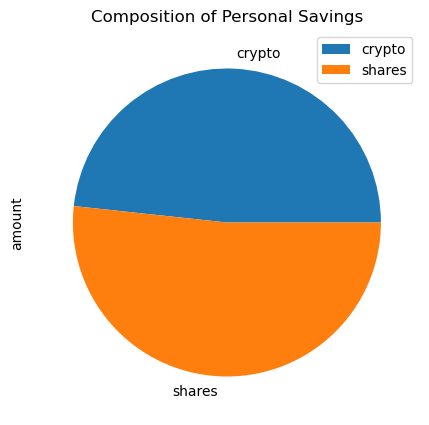

In [97]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = 'Composition of Personal Savings', figsize = (5,5))

In [110]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
tot_savings = tot_crypto + tot_shares

# Validate saving health
if tot_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif tot_savings == emergency_fund:
    print("Congratulations! You have reached yout financial goal.")
else:
    print(f"You are yet to reach your financial goal. You are {round((emergency_fund - tot_savings), 2)} away from your goal")  

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [111]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-12-01', tz='Canada/Eastern').isoformat()
end_date = pd.Timestamp('2022-12-01', tz='Canada/Eastern').isoformat()

In [116]:
# Get 5 years' worth of historical data for SPY and AGG

# Reorganize the DataFrame
# Separate ticker data
tickers1 = ["AGG", "SPY"]

# Timeframe set to 1 day
timeframe1 = "1Day"

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers1,
    timeframe1,
    start = start_date,
    end = end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis = 1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis = 1, keys = ["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-12-01 05:00:00+00:00  109.02  109.48  108.8450  109.16  3331338   
2017-12-04 05:00:00+00:00  109.03  109.17  109.0000  109.15  2652809   
2017-12-05 05:00:00+00:00  109.09  109.26  109.0800  109.26  2995570   
2017-12-06 05:00:00+00:00  109.42  109.52  109.3700  109.37  2965849   
2017-12-07 05:00:00+00:00  109.44  109.46  109.1536  109.23  2584318   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-12-01 05:00:00+00:00       17169  109.190890  264.76  265.31  260.76   
2017-12-04 05:00:00+00:00       12976  109.091729  266.31  266.80  264.08   
2017-12-05 05:00:00+00:00       12990  109.180199  264.43  265.15  263.04   
2017-12-06 05:00:00+00:00       12748  109.432290  262.87  263.73  262.71   
2017-12-07 05:00:00+00:00       12314  109.342038  263.09  264.43  262.94   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-12-01 05:00:00+00:00  264.46  161828840      618108  263.742715  
2017-12-04 05:00:00+00:00  264.11   94195160      335671  265.347767  
2017-12-05 05:00:00+00:00  263.20   78426644      280511  263.979532  
2017-12-06 05:00:00+00:00  263.23   76007777      207320  263.235963  
2017-12-07 05:00:00+00:00  264.04   77287881      193172  263.752511

In [120]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [121]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-12-01 05:00:00+00:00  109.02  109.48  108.8450  109.16  3331338   
2017-12-04 05:00:00+00:00  109.03  109.17  109.0000  109.15  2652809   
2017-12-05 05:00:00+00:00  109.09  109.26  109.0800  109.26  2995570   
2017-12-06 05:00:00+00:00  109.42  109.52  109.3700  109.37  2965849   
2017-12-07 05:00:00+00:00  109.44  109.46  109.1536  109.23  2584318   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-12-01 05:00:00+00:00       17169  109.190890          NaN  264.76   
2017-12-04 05:00:00+00:00       12976  109.091729    -0.000092  266.31   
2017-12-05 05:00:00+00:00       12990  109.180199     0.001008  264.43   
2017-12-06 05:00:00+00:00       12748  109.432290     0.001007  262.87   
2017-12-07 05:00:00+00:00       12314  109.342038    -0.001280  263.09   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2017-12-01 05:00:00+00:00  265.31  260.76  264.46  161828840      618108   
2017-12-04 05:00:00+00:00  266.80  264.08  264.11   94195160      335671   
2017-12-05 05:00:00+00:00  265.15  263.04  263.20   78426644      280511   
2017-12-06 05:00:00+00:00  263.73  262.71  263.23   76007777      207320   
2017-12-07 05:00:00+00:00  264.43  262.94  264.04   77287881      193172   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-12-01 05:00:00+00:00  263.742715          NaN  
2017-12-04 05:00:00+00:00  265.347767    -0.001323  
2017-12-05 05:00:00+00:00  263.979532    -0.003446  
2017-12-06 05:00:00+00:00  263.235963     0.000114  
2017-12-07 05:00:00+00:00  263.752511     0.003077

In [122]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 110.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 120.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 130.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 140.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 150.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 160.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 170.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 180.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 190.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 200.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 210.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 220.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 230.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 240.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 250.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 260.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 270.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 280.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 290.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 300.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 310.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 320.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 330.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 340.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 350.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 360.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 370.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 380.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 390.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 400.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 410.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 420.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 430.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 440.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 450.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 460.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 470.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 480.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 490.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.022113,0.999269,0.996356,0.982432,0.998737,0.987981,0.998273,1.007530,0.995868,0.996030,...,0.989896,0.996055,1.001308,1.005661,1.007582,0.993163,1.002373,1.000131,1.014069,1.000279
2,1.018976,0.996889,1.000980,0.983504,1.007225,0.991289,0.999478,1.017157,0.990477,0.984247,...,1.010699,0.992868,0.997909,1.004555,1.020532,0.983392,1.000441,1.005758,1.001896,0.990705
3,1.026110,0.993043,1.008042,0.982775,1.000273,0.993978,0.998827,1.011747,0.990017,0.973996,...,1.005288,0.985126,1.001662,1.014620,1.009780,0.979266,1.019447,1.008692,1.000658,0.994614
4,1.031271,0.998068,1.017997,0.977392,1.005656,0.997168,1.014738,1.011117,0.985385,0.995200,...,1.008119,0.980692,1.007749,1.022619,1.008973,0.971424,1.018732,1.000308,0.996223,0.980097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.431456,2.375953,5.775704,5.139226,12.939534,1.875656,8.126414,5.112747,13.947265,2.475130,...,2.463920,5.757842,2.094599,1.826591,6.366531,2.966260,3.085254,3.651264,5.981336,4.784119
7557,3.426940,2.377734,5.767285,5.076635,13.170022,1.887610,8.196417,5.094424,13.930585,2.473866,...,2.491268,5.782791,2.090931,1.836536,6.347376,2.972532,3.085962,3.691008,6.008865,4.762144
7558,3.443239,2.362928,5.837684,5.153032,13.008353,1.868184,8.157637,5.112513,14.024802,2.458524,...,2.467633,5.764889,2.081920,1.838040,6.401633,3.000685,3.087800,3.681935,5.951316,4.781817
7559,3.396285,2.344801,5.778770,5.155308,13.084993,1.894512,8.059650,5.101446,14.070011,2.445503,...,2.451567,5.748601,2.103831,1.812800,6.433877,2.992843,3.112258,3.722022,5.980758,4.871395


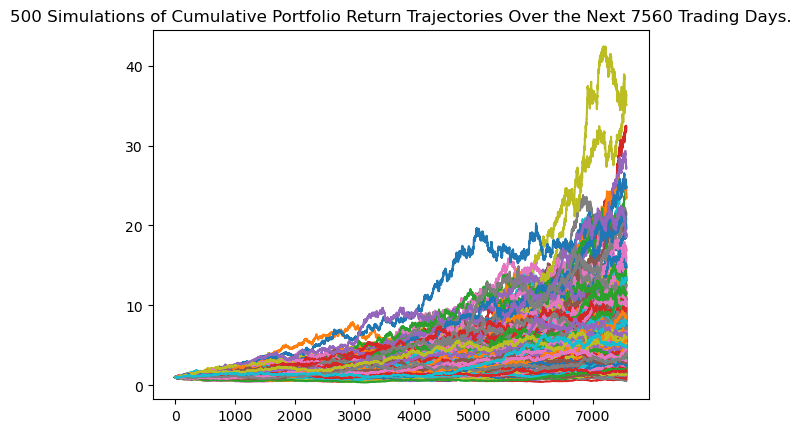

In [123]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

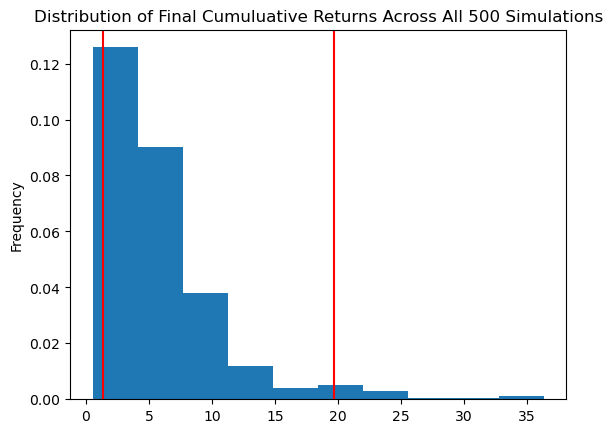

In [124]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [125]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats = MC_sim.summarize_cumulative_return()

# Print summary statistics
print(summ_stats)

count           500.000000
mean              5.857290
std               4.787848
min               0.541700
25%               2.956990
50%               4.428119
75%               7.300048
max              36.307704
95% CI Lower      1.347944
95% CI Upper     19.639956
Name: 7560, dtype: float64


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [127]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summ_stats[8] * initial_investment), 2)
ci_upper = round((summ_stats[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26958.88 and $392799.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [128]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((summ_stats[8] * initial_investment), 2)
ci_upper = round((summ_stats[9] * initial_investment), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $40438.32 and $589198.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [129]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_sim1 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [130]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_sim1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 110.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 120.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 130.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 140.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 150.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 160.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 170.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 180.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 190.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 200.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 210.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 220.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 230.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 240.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 250.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 260.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 270.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 280.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 290.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 300.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 310.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 320.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 330.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 340.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 350.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 360.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 370.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 380.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 390.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 400.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 410.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 420.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 430.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 440.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 450.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 460.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 470.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 480.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

Running Monte Carlo simulation number 490.


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\Common Machine\OneDrive\Desktop

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017444,0.994756,0.988786,0.991343,1.009415,0.990042,1.001143,0.997163,0.986747,1.009723,...,0.995146,0.986002,1.005034,0.997258,1.006323,0.996301,1.001362,0.988672,0.997547,1.013175
2,1.011238,0.988606,0.992957,0.994343,1.013613,1.002172,1.012035,0.988512,0.992754,1.027722,...,1.003001,0.978208,1.007013,0.988886,1.007913,1.000066,1.001033,0.988783,0.991309,1.004940
3,1.031587,0.985773,0.986243,0.979901,1.006754,0.993274,1.010421,0.994695,0.985939,1.022320,...,1.001233,0.985988,1.018851,0.986551,1.003268,0.999872,0.997248,1.008986,0.988142,1.010039
4,1.037184,0.984131,0.985976,0.990647,1.012931,0.978132,1.012332,0.997315,0.970619,1.033532,...,1.013722,0.981243,1.026884,0.999060,1.006349,1.003617,1.010356,1.000665,0.988325,1.021820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.278822,1.157094,0.985083,1.250268,0.910480,1.762000,1.066671,1.191106,1.505367,1.481900,...,1.199159,0.682604,0.671620,0.919460,1.100692,1.697009,0.929869,1.075079,0.788349,1.671607
1257,1.279882,1.161702,0.985260,1.249456,0.903747,1.758952,1.079150,1.196892,1.521354,1.476709,...,1.200103,0.684982,0.675624,0.932792,1.094647,1.696612,0.936415,1.060216,0.785893,1.657623
1258,1.270889,1.167212,1.001910,1.253819,0.913767,1.771787,1.096334,1.185910,1.514538,1.479034,...,1.184156,0.686142,0.679053,0.924474,1.089404,1.689925,0.944464,1.061670,0.790481,1.646963
1259,1.269662,1.160802,1.005273,1.258045,0.912621,1.765918,1.086152,1.187025,1.530288,1.493612,...,1.175538,0.684588,0.689951,0.932189,1.087716,1.676611,0.954427,1.053068,0.791863,1.648850


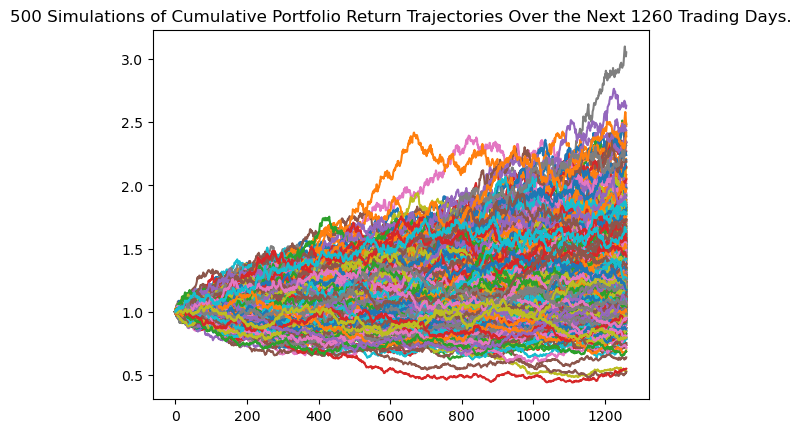

In [ ]:
# Plot simulation outcomes
line_plot1 = MC_sim1.plot_simulation()

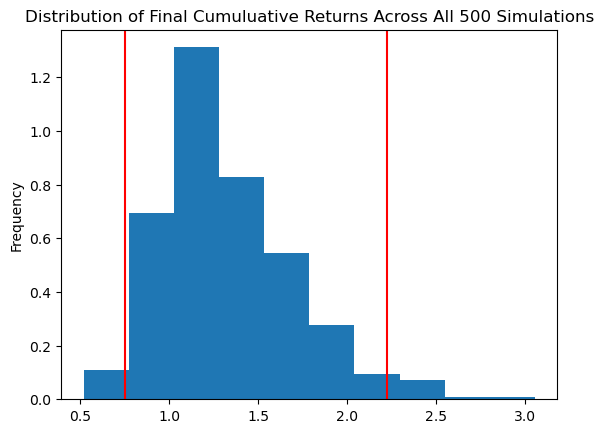

In [132]:
# Plot probability distribution and confidence intervals
dist_plot1 = MC_sim1.plot_distribution()

In [133]:
# Fetch summary statistics from the Monte Carlo simulation results
summ_stats1 = MC_sim1.summarize_cumulative_return()

# Print summary statistics
print(summ_stats1)

count           500.000000
mean              1.325006
std               0.368050
min               0.522063
25%               1.069655
50%               1.249356
75%               1.538773
max               3.053446
95% CI Lower      0.749844
95% CI Upper      2.222685
Name: 1260, dtype: float64


C:\Users\Common Machine\OneDrive\Desktop\FinTech\Homework Assignments\Homework Assignment Week 5\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [135]:
# Set initial investment
ini_invest = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_low = round((summ_stats1[8] * ini_invest), 2)
ci_up = round((summ_stats1[9] * ini_invest), 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ini_invest} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_low} and ${ci_up}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $44990.65 and $133361.08


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


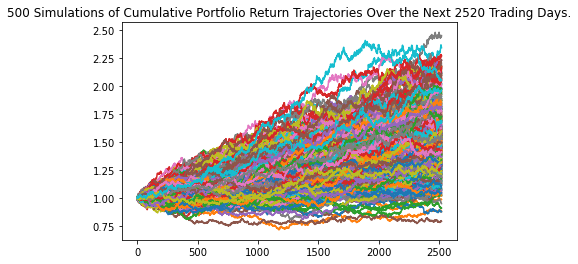

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

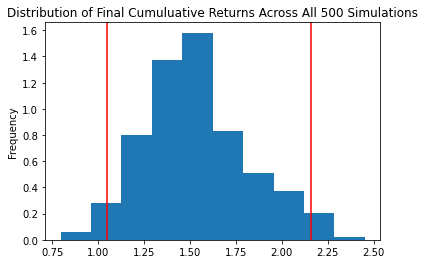

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
